In [1]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.layers import Dropout
from sklearn.metrics import confusion_matrix, classification_report
from skimage.color import rgb2gray
from skimage.transform import resize
import matplotlib.pyplot as plt
import numpy as np

In [2]:
training_path = 'C:/Users/saram/OneDrive/Desktop/Image_Recognition_for_Microplastics-main/Resources/1_Training'
validation_path = 'C:/Users/saram/OneDrive/Desktop/Image_Recognition_for_Microplastics-main/Resources/2_Validation'
testing_path = 'C:/Users/saram/OneDrive/Desktop/Image_Recognition_for_Microplastics-main/Resources/3_Testing'

def resize_images(image):
    resized_image = resize(image.squeeze(), (128, 128))
    return np.expand_dims(resized_image, axis=-1)

def rgb_to_gray(image):
    return rgb2gray(image)

np.random.seed(14)
tf.random.set_seed(14)


datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    preprocessing_function=lambda x: resize(x.squeeze(), (128, 128)),
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=180,
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    fill_mode='nearest',
)

datagen.fit(np.zeros((1, 128, 128, 3)))

train_generator = datagen.flow_from_directory(
    training_path,
    target_size=(128, 128),
    batch_size=924,
    class_mode='binary',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    validation_path,
    target_size=(128, 128),
    batch_size=230,
    class_mode='binary',
    subset='validation'
)

Found 1926 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


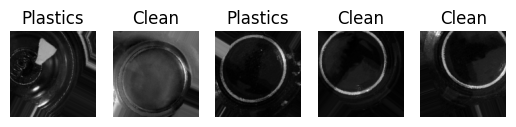

In [3]:
batch = next(train_generator)

images, labels = batch

updated_labels = ["Clean" if label == 0 else "Plastics" for label in labels]

num_images_to_display = 5
for i in range(num_images_to_display):
    plt.subplot(1, num_images_to_display, i + 1)
    plt.imshow(images[i][:, :, 0], cmap='gray')
    plt.title(f"{updated_labels[i]}")
    plt.axis('off')

plt.show()

In [4]:
sample_batch = next(train_generator)
sample_image = sample_batch[0][0]
print("Shape after resize_images:", sample_image.shape)

Shape after resize_images: (128, 128, 3)


In [5]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freezing the convolutional base
base_model.trainable = False

# Modeling with classification head on top of MobileNetV2
model = Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='leaky_relu'),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')
])

# Compiling the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
epochs = 50

history = model.fit(train_generator,
                    epochs=epochs,
                    validation_data=validation_generator)

train_loss, train_accuracy = model.evaluate(train_generator)
valid_loss, valid_accuracy = model.evaluate(validation_generator)

print(f'Training Accuracy: {train_accuracy}')
print(f'Training Loss: {train_loss}')
print(f'----------------------------------------')
print(f'Validation Accuracy: {valid_accuracy}')
print(f'Validation Loss: {valid_loss}')

model.save('microplastics_model.h5')

Epoch 1/50


C:\Users\saram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 75s 11s/step - accuracy: 0.5124 - loss: 0.8130 - val_accuracy: 0.5500 - val_loss: 0.7137
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 3s/step - accuracy: 0.5401 - loss: 0.7255 - val_accuracy: 0.6500 - val_loss: 0.6664
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5715 - loss: 0.6895 - val_accuracy: 0.4500 - val_loss: 0.6629
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.6014 - loss: 0.6742 - val_accuracy: 0.6000 - val_loss: 0.6397
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.5805 - loss: 0.6874 - val_accuracy: 0.7000 - val_loss: 0.6303
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 3s/step - accuracy: 0.5822 - loss: 0.6780 - val_accuracy: 0.8500 - val_loss: 0.5950
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 3s/step - accuracy: 0.6102 - loss: 0.6564 - val_accuracy: 0.8500 - val_loss: 0.5691
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 3s/step - accuracy: 0.5937 - loss: 0.6609 - val_accuracy: 0.8000 - val_loss: 0.5706
Epoch 9/50
3/3 ━━━

Training Accuracy: 0.7653167247772217
Training Loss: 0.4774565100669861
----------------------------------------
Validation Accuracy: 0.8500000238418579
Validation Loss: 0.49355679750442505


In [7]:
testing_generator = datagen.flow_from_directory(
    testing_path,
    target_size=(128, 128),
    batch_size=200,
    class_mode='binary',
    shuffle=False
)

test_loss, test_accuracy = model.evaluate(testing_generator)

print(f'Testing Accuracy: {test_accuracy}')
print(f'Testing Loss: {test_loss}')



Found 200 images belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.6900 - loss: 0.5664
Testing Accuracy: 0.6899999976158142
Testing Loss: 0.5664420127868652


In [8]:
predictions = model.predict(testing_generator)

binary_predictions = (predictions > 0.01).astype(int)

true_labels = testing_generator.classes

conf_matrix = confusion_matrix(true_labels, binary_predictions)
print("Confusion Matrix:")
print(conf_matrix)

classification_rep = classification_report(true_labels, binary_predictions)
print("Classification Report:")
print(classification_rep)

print(f'Testing Accuracy: {test_accuracy}')
print(f'Testing Loss: {test_loss}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
Confusion Matrix:
[[  0 100]
 [  0 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.50      1.00      0.67       100

    accuracy                           0.50       200
   macro avg       0.25      0.50      0.33       200
weighted avg       0.25      0.50      0.33       200

Testing Accuracy: 0.6899999976158142
Testing Loss: 0.5664420127868652


C:\Users\saram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\saram\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [9]:
import os
from tensorflow.keras.preprocessing import image
import numpy as np

testing_path2 = 'C:/Users/saram/OneDrive/Desktop/Image_Recognition_for_Microplastics-main\Resources/3_Testing/2_Microplastics'

val_path = os.path.join(testing_path2)
val_pics = os.listdir(testing_path2)

image_filename = val_pics[11]

In [11]:
image_filename
image_path = os.path.join(testing_path2, image_filename)

In [12]:
img = image.load_img(image_path, target_size=(128, 128))  
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)

single_image_predictions = model.predict(img_array)

single_image_binary_prediction = (single_image_predictions > 0.5).astype(int)

print("Raw Predictions:", single_image_predictions)
print("Binary Prediction:", single_image_binary_prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Raw Predictions: [[0.40722305]]
Binary Prediction: [[0]]


In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_custom_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    
    img_array = image.img_to_array(img)
    
    img_array = np.expand_dims(img_array, axis=0)
    
    img_array = img_array / 255.0  
    
    return img_array


In [14]:
def predict_custom_image(model, image_path):
    processed_image = preprocess_custom_image(image_path)
    
    prediction = model.predict(processed_image)
    
    binary_prediction = (prediction > 0.5).astype(int)
    
    return prediction, binary_prediction


In [26]:
import os
# Clean samples 
test_images_dir = 'Resources/Custom/1_Clean_Water'

for img_name in os.listdir(test_images_dir):
    img_path = os.path.join(test_images_dir, img_name)
    
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    
    single_image_prediction = model.predict(img_array)
    binary_prediction = (single_image_prediction > 0.005).astype(int)
    print(single_image_prediction)
    print(f"Image: {img_name} - Prediction: {'Microplastic' if binary_prediction == 0 else 'clean'}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
[[0.03873549]]
Image: clean.jpg - Prediction: clean
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.01721162]]
Image: clean_1.jpg - Prediction: clean


In [25]:
import os
# Microplastic sample
test_images_dir = 'Resources/Custom/2_Microplastics'

for img_name in os.listdir(test_images_dir):
    img_path = os.path.join(test_images_dir, img_name)
    
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0
    
    single_image_prediction = model.predict(img_array)
    binary_prediction = (single_image_prediction > 0.005).astype(int)
    print(single_image_prediction)
    print(f"Image: {img_name} - Prediction: {'Microplastic' if binary_prediction == 0 else 'clean'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[6.6649836e-06]]
Image: b--20-_jpg.rf.7314f73f985116f2d90f08770260794e.jpg - Prediction: Microplastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[[7.763289e-05]]
Image: dirty.jpg - Prediction: Microplastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.00346234]]
Image: dirty_1.jpg - Prediction: Microplastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.0003865]]
Image: WhatsApp Image 2024-10-20 at 13.44.48_3198bbaa.jpg - Prediction: Microplastic
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[0.00217851]]
Image: WhatsApp Image 2024-10-20 at 13.53.28_3fa50241.jpg - Prediction: Microplastic
